In [1]:
import pandas as pd

In [2]:
train_dataset = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_dataset = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: xlabel='OverallCond', ylabel='SalePrice'>

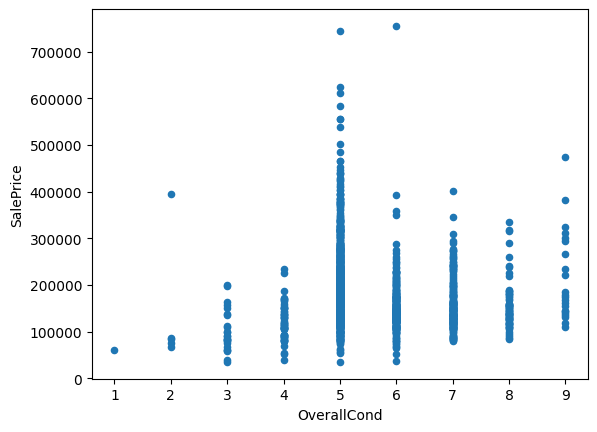

In [4]:
train_dataset.plot.scatter(x="OverallCond", y="SalePrice")

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

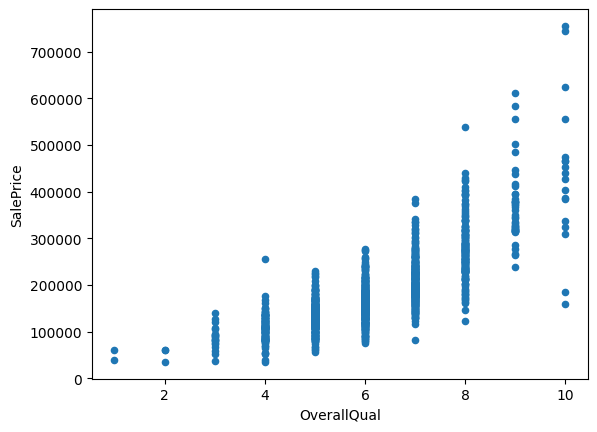

In [5]:
train_dataset.plot.scatter(x="OverallQual", y="SalePrice")

In [6]:
import pycaret.regression as regression

In [7]:
regression.setup(data=train_dataset)

,Description,Value
0,Session id,2088
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 277)"
5,Transformed train set shape,"(1021, 277)"
6,Transformed test set shape,"(439, 277)"
7,Numeric features,37
8,Categorical features,43
9,Rows with missing values,100.0%


In [8]:
best_model = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16990.7463,1051168473.5175,30106.4065,0.8320,0.1414,0.0987,0.2100
lightgbm,Light Gradient Boosting Machine,17476.3224,1043256254.2241,30692.9437,0.8287,0.1423,0.1005,0.2280
et,Extra Trees Regressor,18490.2638,1064886141.7026,31364.5249,0.8226,0.1546,0.1093,0.3630
rf,Random Forest Regressor,18801.3638,1161487139.2963,32300.1501,0.8082,0.1567,0.1120,0.3640
ridge,Ridge Regression,19298.4411,1345311129.6221,34197.3714,0.7528,0.2002,0.1159,0.1300
ada,AdaBoost Regressor,24264.6236,1507194728.4783,37578.2275,0.7445,0.2002,0.1560,0.1970
llar,Lasso Least Angle Regression,18844.1906,1396919275.6176,35266.7348,0.7349,0.1808,0.1129,0.1410
lasso,Lasso Regression,19265.4542,1448071581.1209,35960.7115,0.7272,0.2065,0.1150,0.4500
dt,Decision Tree Regressor,25930.8739,1681444041.4075,39658.2491,0.7259,0.2072,0.1529,0.1340
en,Elastic Net,20374.7031,1622746756.4002,36891.2956,0.7039,0.1690,0.1189,0.2070


In [9]:
best_model

GradientBoostingRegressor(random_state=2088)

In [10]:
gbr_model = regression.create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18584.6620,1145355892.8353,33843.1070,0.7968,0.1650,0.1127
1,12762.7681,303972595.9037,17434.8099,0.9101,0.1198,0.0898
2,21027.1180,3174706294.4691,56344.5321,0.6742,0.1624,0.0994
3,17013.4562,753614880.6014,27452.0469,0.8758,0.1402,0.0923
4,17976.3215,764425251.1605,27648.2414,0.8909,0.1419,0.1026
5,14625.8601,414883030.2193,20368.6777,0.9013,0.1214,0.0928
6,17552.6166,851077820.4338,29173.2381,0.8050,0.1580,0.1060
7,21050.6218,2222421815.7997,47142.5690,0.5972,0.1850,0.1237
8,15984.4417,549164908.7796,23434.2678,0.9203,0.1279,0.0955


In [12]:
gbr_model

GradientBoostingRegressor(random_state=2088)

In [11]:
tuned_model = regression.tune_model(gbr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22994.2940,1128429788.9120,33592.1090,0.7998,0.1982,0.1455
1,16548.1913,467434921.8289,21620.2433,0.8618,0.1567,0.1183
2,28366.2617,3135379871.7596,55994.4629,0.6783,0.2010,0.1480
3,23241.7513,987854834.2541,31430.1580,0.8372,0.1517,0.1262
4,21426.4785,922513387.9801,30372.9055,0.8684,0.1890,0.1301
5,19731.8001,690109557.0715,26269.9364,0.8359,0.1590,0.1245
6,26998.6002,3146994880.2474,56098.0827,0.2791,0.2347,0.1605
7,24034.3944,2245203311.7727,47383.5764,0.5931,0.2029,0.1521
8,20618.0334,817846727.6858,28598.0196,0.8813,0.1748,0.1233


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
tuned_model

GradientBoostingRegressor(random_state=2088)

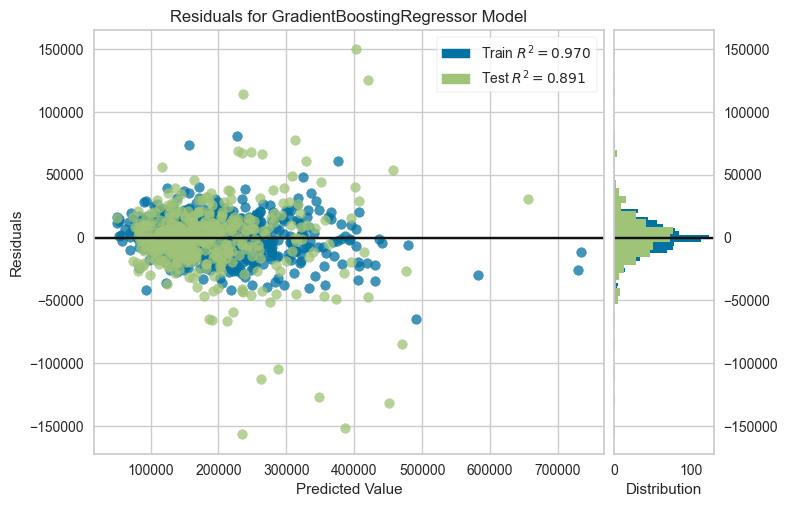

In [14]:
regression.plot_model(gbr_model)

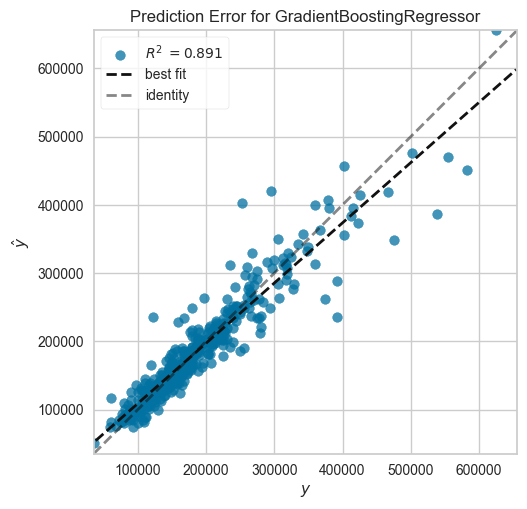

In [15]:
regression.plot_model(gbr_model, plot="error")

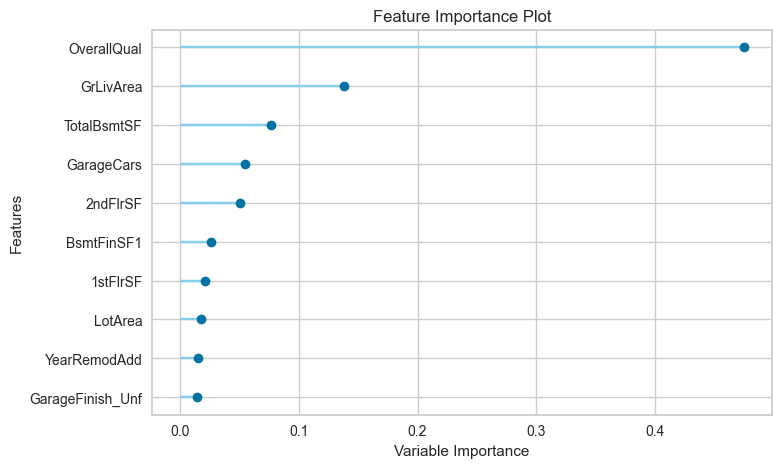

In [16]:
regression.plot_model(gbr_model, plot="feature")

In [17]:
final_model = regression.finalize_model(gbr_model)

In [19]:
test_predicted = regression.predict_model(final_model, data=test_dataset)

In [20]:
test_predicted

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,121113.166464
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,164679.386752
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,177012.878897
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,182521.630713
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,198647.726294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,74299.628240
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,85018.812424
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,158794.026304
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,118078.983982
